# US Retail Trade and Food Services 

In this notebook we would like to explore how COVID-19 has changed the landscape of US consumer spending in US retail trade and food services.

We will be using census data from the US government that spans from January '92 to January '21.

Estimates are shown in __millions of dollars__ and are based on data from the Monthly Retail Trade Survey, Annual Retail Trade Survey, Service Annual Survey, and administrative records.

The census data is not adjusted for seasonal variations, holidays, or trading day differences. Note that later in the analysis we will use only data that __is adjusted__.

### Quick links 
1. Data retrieved from United States Census Bureau in April 2021:  
Monthly Retail Trade and Food Services report (under Monthly Retail Trade Report)  https://www.census.gov/retail/index.html

2. TL;DR jump to [final product](#tldr)

In [116]:
import numpy as np
import pandas as pd

### Load data 

First, we will import data directly from the monthly excel report and understand what is available.

In [117]:
xls = pd.ExcelFile('mrtssales92-present.xls')

In [118]:
print(xls.sheet_names)

['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992']


In [119]:
pd.read_excel(xls, '2020').head()

,Estimates of Monthly Retail and Food Services Sales by Kind of Business: 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,[Estimates are shown in millions of dollars an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NAICS Code,Kind of Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020,Oct. 2020,Nov. 2020,Dec. 2020,TOTAL,NaN
4,NaN,NOT ADJUSTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess data for analysis
The excel is in a table format that isn't exactly in a good DataFrame format with columns and rows where we expect. Additionally, upon comprehensive review of most rows it appears there are also two sets of similar data: __Not Adjusted__ starting at row 4 and __Adjusted__ starting at row 70. We will try to correct that by reading in at the correct header location (using the adjusted values only) and rename the columns where needed.

A note on what __Adjusted__ values mean based on the US census report: 
>Estimates are adjusted for seasonal variations and holiday and trading-day differences, but not for price changes. Cumulative seasonally adjusted sales estimates are not tabulated.

In [120]:
df_20 = pd.read_excel(xls, '2020', header = 4)
df_20 = df_20.rename(columns={"Unnamed: 0": "NAICS Code", "Unnamed: 1": "Kinds of Business"})
# also we will drop anything before row 70, but since we read the data starting at row 4
# this should now be row 70 minus 4, or 66
df_20.drop(index=np.arange(0,70-4), inplace=True)
df_20.head(10)

,NAICS Code,Kinds of Business,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020,Oct. 2020,Nov. 2020,Dec. 2020,TOTAL,Unnamed: 15
66,NaN,ADJUSTED(2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,"Retail and food services sales, total",528822,528541,483949,412766,488218,529962,535923,543404,552767,552193,545248,538338,NaN,NaN
68,NaN,Retail sales and food services excl motor vehi...,423554,422637,405952,344298,386681,419239,425872,432178,438043,437350,432255,423345,NaN,NaN
69,NaN,Retail sales and food services excl gasoline s...,486218,487333,449466,386718,459034,496398,500837,508021,516737,516161,509837,500256,NaN,NaN
70,NaN,Retail sales and food services excl motor vehi...,380950,381429,371469,318250,357497,385675,390786,396795,402013,401318,396844,385263,NaN,NaN
71,NaN,"Retail sales, total",463338,463251,438221,382734,448788,479823,483699,488998,497072,496660,491713,487393,NaN,NaN
72,NaN,"Retail sales, total (excl. motor vehicle and p...",358070,357347,360224,314266,347251,369100,373648,377772,382348,381817,378720,372400,NaN,NaN
73,NaN,GAFO(1),110025,109349,98312,71515,87586,104611,106230,106248,111498,109940,107104,105478,NaN,NaN
74,441,Motor vehicle and parts dealers,105268,105904,77997,68468,101537,110723,110051,111226,114724,114843,112993,114993,NaN,NaN
75,"4411,4412",Automobile and other motor vehicle dealers,97305,98055,70902,61763,93286,101986,101477,102535,106202,106581,104700,106704,NaN,NaN


This is a great step forward, however it would be best to flatten the columns for years and months for ease of use in down the road for analysis. We will label the new columns "Month_Year" and "Sales".

In [121]:
df_20 = df_20.melt(id_vars=["NAICS Code", "Kinds of Business"], var_name="Month_Year")
df_20 = df_20.rename(columns={"value": "Sales"})
df_20.head()

,NAICS Code,Kinds of Business,Month_Year,Sales
0,NaN,ADJUSTED(2),Jan. 2020,NaN
1,NaN,"Retail and food services sales, total",Jan. 2020,528822
2,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,423554
3,NaN,Retail sales and food services excl gasoline s...,Jan. 2020,486218
4,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,380950


As we can see, there remains rows with NaN in our Sales column, let's deal with them.

In [122]:
df_20[df_20['Sales'].isnull()].head(15)

,NAICS Code,Kinds of Business,Month_Year,Sales
0,NaN,ADJUSTED(2),Jan. 2020,NaN
39,,NaN,Jan. 2020,NaN
40,(S) Suppressed - Estimate does not meet public...,NaN,Jan. 2020,NaN
41,"is less than 50%), or other concerns about the...",NaN,Jan. 2020,NaN
42,,NaN,Jan. 2020,NaN
43,(1) GAFO represents stores classified in the f...,NaN,Jan. 2020,NaN
44,(2) Estimates are adjusted for seasonal variat...,NaN,Jan. 2020,NaN
45,,NaN,Jan. 2020,NaN
46,Note: Estimates are not adjusted for price cha...,NaN,Jan. 2020,NaN
47,"Information on sample design, estimation proce...",NaN,Jan. 2020,NaN


Based on the samples shown, these NaN are not rows of concern - these rows do not represent any kinds of businesses and so we can safely drop all rows where Sales is NaN.

In [123]:
df_20 = df_20.dropna(subset={'Sales'})

In [124]:
df_20.head(30)

,NAICS Code,Kinds of Business,Month_Year,Sales
1,NaN,"Retail and food services sales, total",Jan. 2020,528822
2,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,423554
3,NaN,Retail sales and food services excl gasoline s...,Jan. 2020,486218
4,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,380950
5,NaN,"Retail sales, total",Jan. 2020,463338
6,NaN,"Retail sales, total (excl. motor vehicle and p...",Jan. 2020,358070
7,NaN,GAFO(1),Jan. 2020,110025
8,441,Motor vehicle and parts dealers,Jan. 2020,105268
9,"4411,4412",Automobile and other motor vehicle dealers,Jan. 2020,97305
10,4413,"Automotive parts, acc., and tire stores",Jan. 2020,7963


This is looking good. However, there are rows in Kinds of Business that appear to be subtotals that we don't want here. The pattern looks to be that these subtotal rows are NaN under NAICS code. Let's have a look.

In [125]:
df_20[df_20['NAICS Code'].isnull()].head(15)

,NAICS Code,Kinds of Business,Month_Year,Sales
1,NaN,"Retail and food services sales, total",Jan. 2020,528822
2,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,423554
3,NaN,Retail sales and food services excl gasoline s...,Jan. 2020,486218
4,NaN,Retail sales and food services excl motor vehi...,Jan. 2020,380950
5,NaN,"Retail sales, total",Jan. 2020,463338
6,NaN,"Retail sales, total (excl. motor vehicle and p...",Jan. 2020,358070
7,NaN,GAFO(1),Jan. 2020,110025
49,NaN,"Retail and food services sales, total",Feb. 2020,528541
50,NaN,Retail sales and food services excl motor vehi...,Feb. 2020,422637
51,NaN,Retail sales and food services excl gasoline s...,Feb. 2020,487333


Filtering for the NaN shows us that these are indeed all subtotals. The only standout is GAFO - however a quick search shows us that it stands for General Merchandise, Apparel and Accessories, Furniture and Other Sales (retail sales categories). These are STORES CLASSIFIED IN NAICS 442, 443, 448, 451, 452, AND 4532. Another subtotal category we can remove.

In [126]:
df_20 = df_20.dropna(subset={'NAICS Code'})
df_20.head()

,NAICS Code,Kinds of Business,Month_Year,Sales
8,441,Motor vehicle and parts dealers,Jan. 2020,105268
9,"4411,4412",Automobile and other motor vehicle dealers,Jan. 2020,97305
10,4413,"Automotive parts, acc., and tire stores",Jan. 2020,7963
11,"442,443","Furniture, home furn, electronics, and applian...",Jan. 2020,18236
12,442,Furniture and home furnishings stores,Jan. 2020,10161


### Data exploration 
Before we go further, let's understand the data we have.

In [127]:
df_20.describe(include='all')

,NAICS Code,Kinds of Business,Month_Year,Sales
count,372,372,372,372
unique,31,31,12,358
top,448,Warehouse clubs and superstores,Feb. 2020,(S)
freq,12,12,31,13


Why is the top value in Sales '(S)'? Looking into the publication further we see that (S) SUPPRESSED - ESTIMATE DOES NOT MEET PUBLICATION STANDARDS BECAUSE OF HIGH SAMPLING VARIABILITY (COEFFICIENT OF VARIATION IS GREATER THAN 30%), POOR RESPONSE QUALITY (TOTAL QUANTITY RESPONSE RATE IS LESS THAN 50%), OR OTHER CONCERNS ABOUT THE ESTIMATE'S QUALITY.

Let's drop these rows.

In [128]:
# Get names of indexes for which column Sales has value (S)
indexNames = df_20[ df_20['Sales'] == '(S)'].index
# Delete these row indexes from dataFrame
df_20.drop(indexNames, inplace=True)

In [129]:
df_20.describe()

,NAICS Code,Kinds of Business,Month_Year,Sales
count,359,359,359,359
unique,31,31,12,357
top,448,Warehouse clubs and superstores,Jan. 2020,7849
freq,12,12,31,2


### Exploration: Round Two
Now that we're all set, we will break up the Month_Year column into more manageable Month and Year columns before conducting further exploratory analysis. 

In [130]:
df_20.head()

,NAICS Code,Kinds of Business,Month_Year,Sales
8,441,Motor vehicle and parts dealers,Jan. 2020,105268
9,"4411,4412",Automobile and other motor vehicle dealers,Jan. 2020,97305
10,4413,"Automotive parts, acc., and tire stores",Jan. 2020,7963
11,"442,443","Furniture, home furn, electronics, and applian...",Jan. 2020,18236
12,442,Furniture and home furnishings stores,Jan. 2020,10161


In [131]:
# new data frame with split value columns
new = df_20["Month_Year"].str.split(". ", n = 1, expand = True)
  
# making separate first name column from new data frame
df_20["Month"]= new[0]
  
# making separate last name column from new data frame
df_20["Year"]= new[1]

In [132]:
df_20.head()

,NAICS Code,Kinds of Business,Month_Year,Sales,Month,Year
8,441,Motor vehicle and parts dealers,Jan. 2020,105268,Jan,2020
9,"4411,4412",Automobile and other motor vehicle dealers,Jan. 2020,97305,Jan,2020
10,4413,"Automotive parts, acc., and tire stores",Jan. 2020,7963,Jan,2020
11,"442,443","Furniture, home furn, electronics, and applian...",Jan. 2020,18236,Jan,2020
12,442,Furniture and home furnishings stores,Jan. 2020,10161,Jan,2020


In [133]:
df_20.describe()

,NAICS Code,Kinds of Business,Month_Year,Sales,Month,Year
count,359,359,359,359,359,359
unique,31,31,12,357,12,1
top,448,Warehouse clubs and superstores,Jan. 2020,7849,Jan,2020
freq,12,12,31,2,31,359


We will also want to make sure the Sales column data type is a numeric type that plotting libraries can use.

In [134]:
df_20['Sales'] = df_20['Sales'].astype(np.float64)

In [135]:
df_20.dtypes

NAICS Code            object
Kinds of Business     object
Month_Year            object
Sales                float64
Month                 object
Year                  object
dtype: object

### Exploration through visualization 
To cap off, we use Seaborn library to create several views that uncover just how US consumer spending has shifted across retail trade and food services (on average) in 2020.

<AxesSubplot:xlabel='Month', ylabel='Sales'>

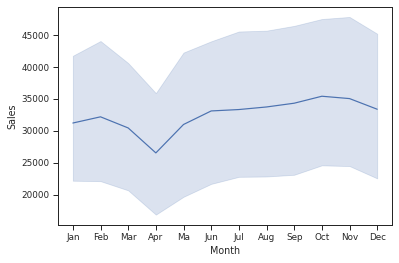

In [136]:
import seaborn as sns

sns.lineplot(data=df_20, x="Month", y="Sales", estimator='mean')

As anticipated, April lockdowns and restrictions impacted sales in April generally, however sales returned stronger than ever from June and beyond. How did this impact look across different retail categories?

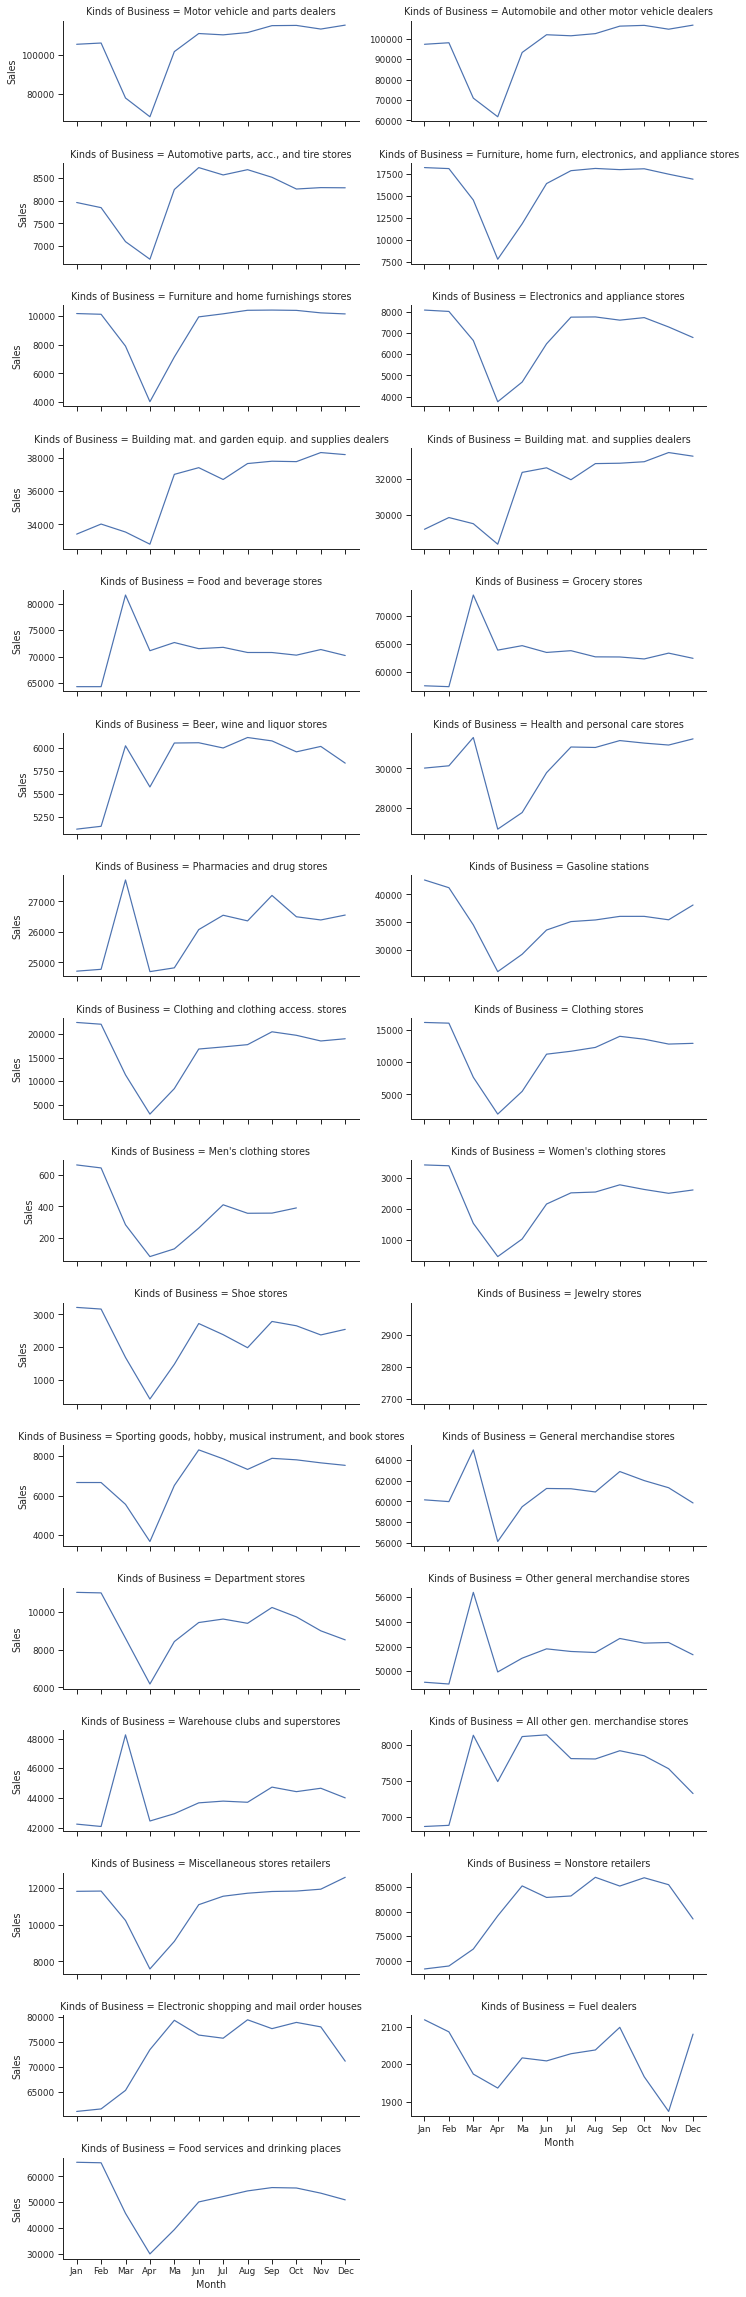

In [137]:
g = sns.FacetGrid(df_20, col="Kinds of Business", col_wrap=2, height = 2, aspect = 2.5, sharey=False)
g.map(sns.lineplot, "Month", "Sales", estimator = np.sum)

### Future investigation 
Additional questions that invites further exploration and analysis, ordered by effort:

* __[COMPLETED BELOW]__ ~~Low: How much of this is seasonality driven? What if we include 2019 and 2018 for comparison?~~
* Can we combine similar business categories?
* Can we adjust for inflation to see true sales increases over time?
     
Finally, the provided categories may not all be mutually exclusive even after removing some obvious subtotal rows, meaning the sum of sales across categories therefore may not match the top level total in this data set (or totals on any other reports from the US census site). Further understanding of the category compositions may be needed before any meaningful aggregation can be made.

# Part Two: Adding a dash of seasonality 

### More preprocessing
We will need to append the 2019 data and 2018 data, but we did a lot of work to get 2020 and want to reuse that methodology for consistency and time savings. Let's build a function to a) get the data formatted and b) merge them into a DataFrame that contains our full 2018-2020 data.

In [138]:
def extractToDF(excel_file, sheet_name):
    """
    create a function taking in excel sheet, sheet name as input 
    and returning a dataframe as output
    """
    
    # Read in the sheet and make sure the format is correct
    dfo = pd.read_excel(excel_file, sheet_name, header = 4)
    dfo = dfo.rename(columns={"Unnamed: 0": "NAICS Code", "Unnamed: 1": "Kinds of Business"})
    dfo.drop(index=np.arange(0,70-4), inplace=True)
    dfo = dfo.melt(id_vars=["NAICS Code", "Kinds of Business"], var_name="Month_Year")
    dfo = dfo.rename(columns={"value": "Sales"})

    # Drop the rows with NaN on Sales and NAICS Code columns
    dfo = dfo.dropna(subset={'Sales'})
    dfo = dfo.dropna(subset={'NAICS Code'})
    
    # Drop the rows where Sales is (S)
    indexNames = dfo[ dfo['Sales'] == '(S)'].index
    dfo.drop(indexNames, inplace=True)
    
    # Create new columns to split for month and year
    new = dfo["Month_Year"].str.split(". ", n = 1, expand = True)
    dfo["Month"]= new[0]
    dfo["Year"]= new[1]
    
    # Create new column for Month as a numeric
    dfo['Month_Num'] = dfo.apply(lambda row: monthnum(row['Month']), axis=1)
    
    # Make Sale column a numeric
    dfo['Sales'] = dfo['Sales'].astype(int)
    dfo['Month_Num'].astype(int)
      
    return dfo

def monthnum(month):
    """
    map the month labels to a month numeric values
    """
    mapping = { 
        'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'Ma' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9,
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12
    }
    return mapping.get(month)

With the function created let's try it out on 2020 data again and confirm results are the same:

In [139]:
df_sales = extractToDF(xls, '2020')
df_sales[df_sales['Month']=='Jan']['Sales'].sum()

967623

In [140]:
df_20[df_20['Month']=='Jan']['Sales'].sum()

967623.0

Perfect, now we will gather sales data for all of 2018 to 2020 into one dataframe

In [141]:
years = ['2018','2019','2020']

def yearsToDF(excel_file, years_list):
    dfo = pd.DataFrame()
    for item in years_list:
        dfi = extractToDF(excel_file, item)
        dfo = pd.concat([dfo,dfi])
    return dfo

df_multi = yearsToDF(xls, years)
df_multi.describe(include='all')

,NAICS Code,Kinds of Business,Month_Year,Sales,Month,Year,Month_Num
count,1103.0,1103,1103,1103.000000,1103,1103,1103.000000
unique,31.0,31,36,NaN,12,3,NaN
top,451.0,Warehouse clubs and superstores,May 2019,NaN,Jan,2019,NaN
freq,36.0,36,31,NaN,93,372,NaN
mean,NaN,NaN,NaN,30843.740707,NaN,NaN,6.487761
std,NaN,NaN,NaN,28304.031959,NaN,NaN,3.454866
min,NaN,NaN,NaN,81.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,7541.500000,NaN,NaN,3.000000
50%,NaN,NaN,NaN,22269.000000,NaN,NaN,6.000000
75%,NaN,NaN,NaN,52302.500000,NaN,NaN,9.000000


### <a id='tldr'>Exploration through visualization (now with historical context)</a>
And finally to plot the comparisons by year into one FacetGrid of line plots:

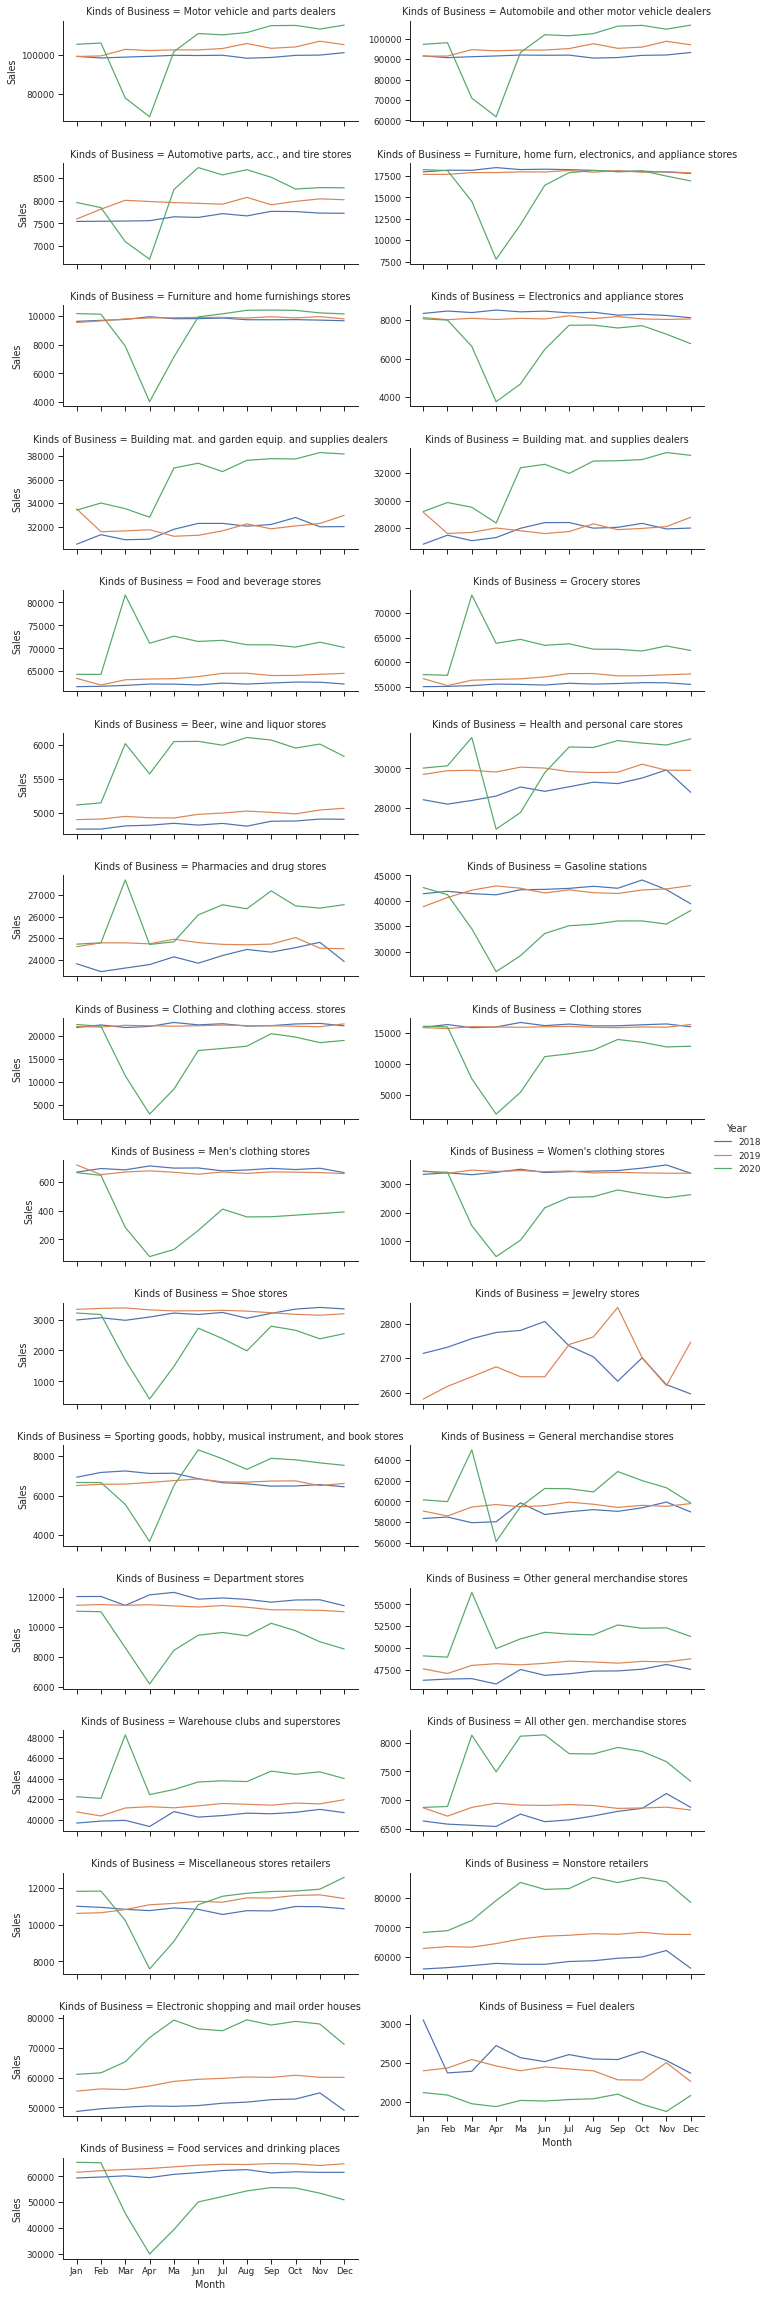

In [142]:
sns.set(style='ticks', context='paper')
g = sns.FacetGrid(df_multi, col="Kinds of Business", hue_order = years, hue='Year', col_wrap=2, height = 2, aspect = 2.5, sharey=False, legend_out=True);
g.map(sns.lineplot, "Month", "Sales", estimator = np.sum);
g.add_legend();

###  Closing remarks 

We set out to explore how COVID-19 has changed the landscape of US consumer spending in US retail trade and food services, and with the help of our analysis above we now have a much better understanding where and when these changes occured.

Of note, we can observe the impact was not equal across business categories, in fact we can say that the impact generally fell across the following spectrum:

1. **The business as usual**: Sales were either minimally impacted (ie. dips in March) or experienced no impacts at all
2. **The fortunate**: Sales were boosted either in the shortrun (ie. panic purchases at grocery stores in March) or created new highs that have persisted (ie. online shopping re: all of 2020)
3. **The less fortunate**: Sales never picked up to historical levels (ie. food services and department stores where physical distancing measures hit hard)